In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import logging
from eden.util import configure_logging
configure_logging(logging.getLogger(), verbosity=1)
from IPython.core.display import HTML
HTML('<style>.container { width:95% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')
import showroc as sr

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:1352: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:

# SETTING UP TEST VARIABLES:

assay_id = '624466'  # apr88
assay_id = '588350'  # apr86
assay_id = '449764'  # apr85
assay_id = '492952'  # apr85
assay_id = '463112'  # apr82
assay_id = '463213'  # apr70
assay_id = '119'  # apr60 30k mols
assay_id = '1224857'  # apr10
assay_id = '2326'  # apr03 200k mols
assay_id = '1834'  # apr90 500 mols


assay_id = '651610'  # apr93 23k mols
repeats = 3
n_iter = 25
train_size = 1000

if True:  # debug
    assay_id = '651610' # 1834 is bad because there are too few compounds :D  65* is too large for testing
    repeats = 2
    n_iter = 2
    train_size=20

In [3]:
from showroc import make_data, generative_training, generative_training_2, evaluate_all, simple_draw_graph_quality
from graphlearn.trial_samplers import GAT

'''
explaining the options:
pick strategy: random   picks seeds at random
               high_scores  picks highest scoring seeds
               cluster   clusters highest scoring seeds, picks largest cluster
generative_training / generative_training_2 : the _2 version will start with the support of negative instances
'''


'\nexplaining the options:\npick strategy: random   picks seeds at random\n               high_scores  picks highest scoring seeds\n               cluster   clusters highest scoring seeds, picks largest cluster\ngenerative_training / generative_training_2 : the _2 version will start with the support of negative instances\n'

indicator of tak-ease:
crossval train: 0.9531 +- 0.0012   crossval: 0.9455 +- 0.0039
{'active': 3866, 'inactive': 19293}
0  1  0  1 

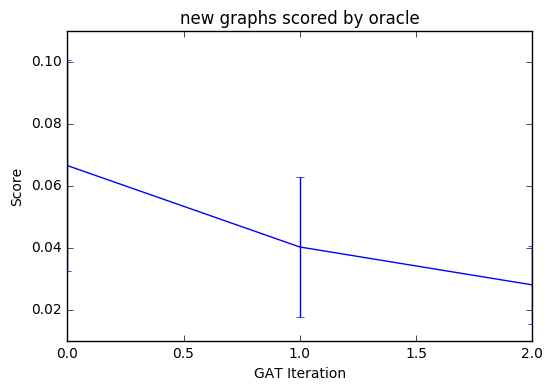

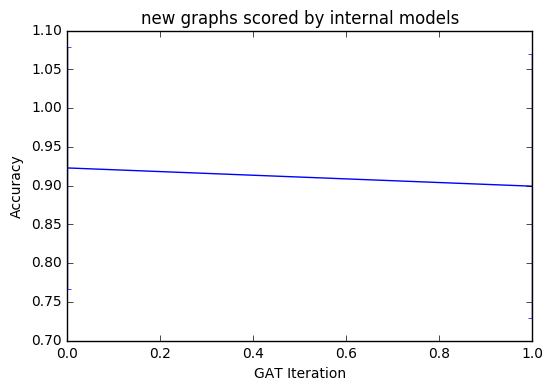

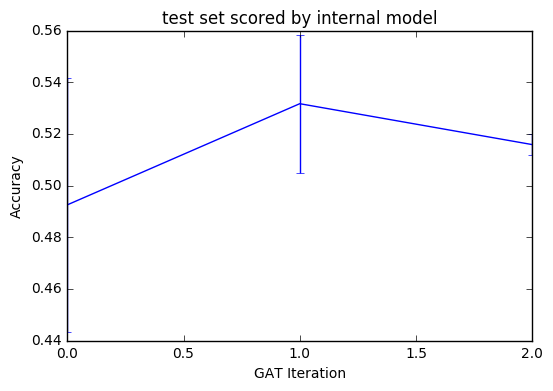

 ################################################################################
indicator of tak-ease:
crossval train: 0.9529 +- 0.0014   crossval: 0.9455 +- 0.0034
{'active': 3866, 'inactive': 19293}
0  1  0  1 

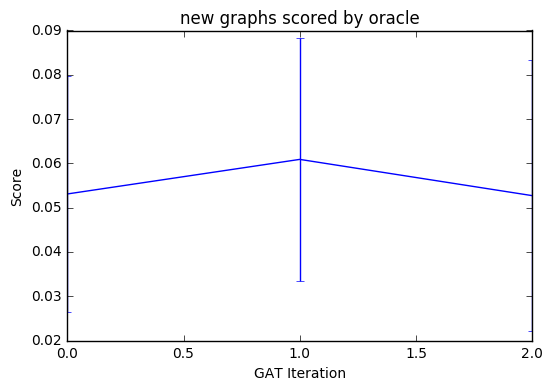

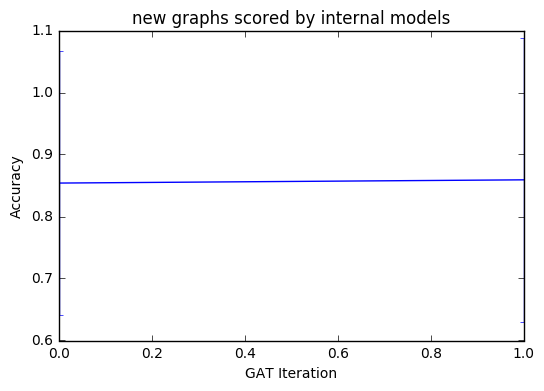

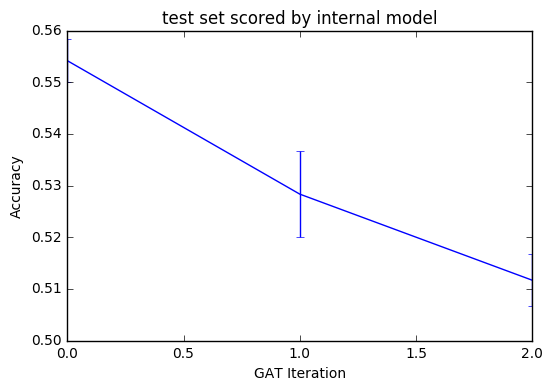

 ################################################################################
indicator of tak-ease:
crossval train: 0.9529 +- 0.0013   crossval: 0.9452 +- 0.0032
{'active': 3866, 'inactive': 19293}
0  1  0  1 

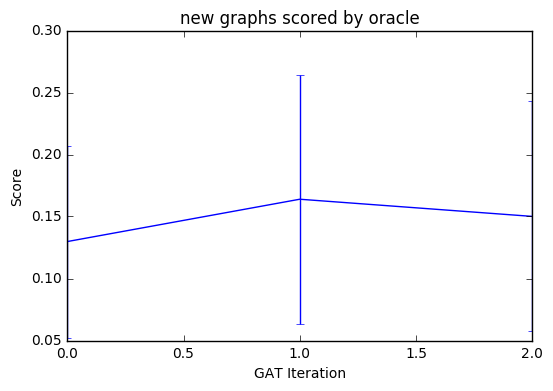

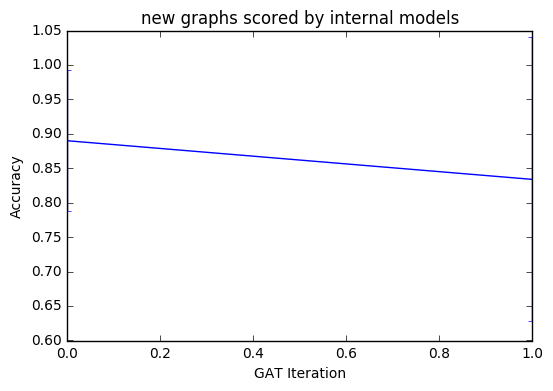

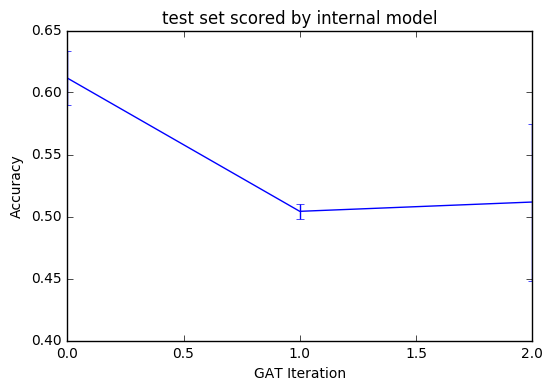

 ################################################################################
indicator of tak-ease:
crossval train: 0.9532 +- 0.0011   crossval: 0.9456 +- 0.0037
{'active': 3866, 'inactive': 19293}
0  1  0  1 

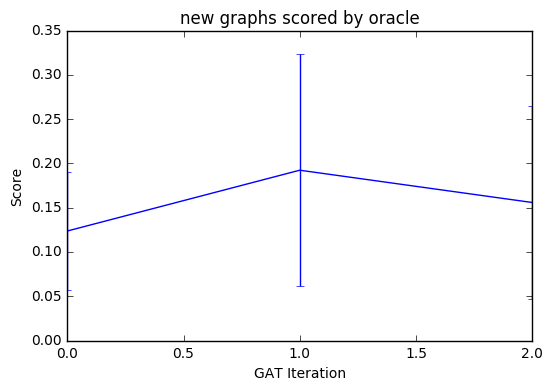

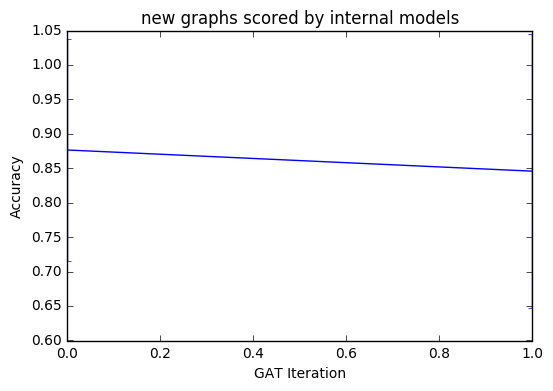

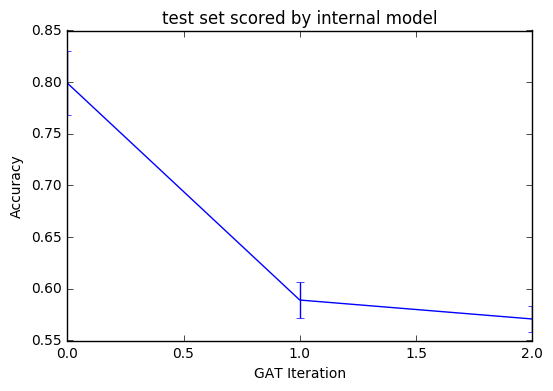

 ################################################################################
indicator of tak-ease:
crossval train: 0.9531 +- 0.0009   crossval: 0.9457 +- 0.0037
{'active': 3866, 'inactive': 19293}
0  1  0  1 

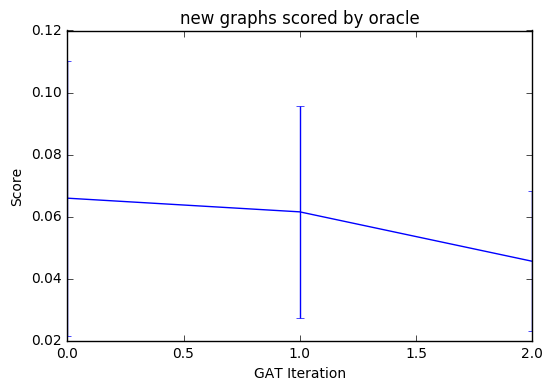

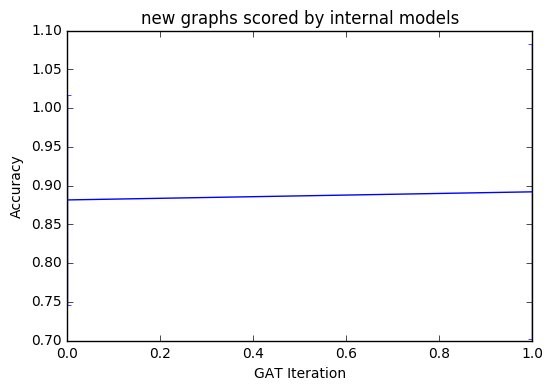

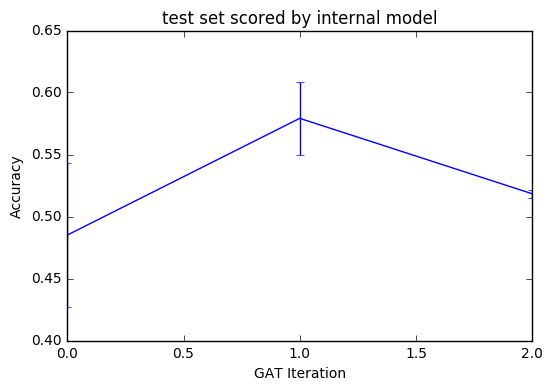

 ################################################################################
indicator of tak-ease:
crossval train: 0.9527 +- 0.0016   crossval: 0.9455 +- 0.0038
{'active': 3866, 'inactive': 19293}
0  1  0  1 

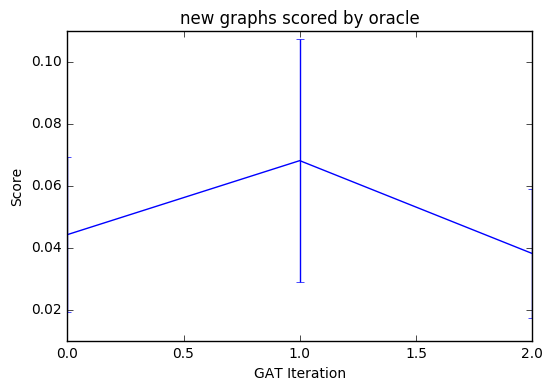

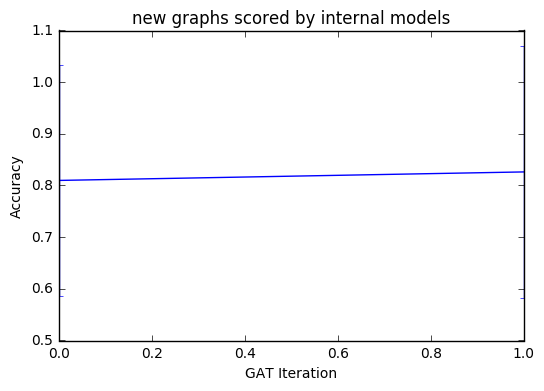

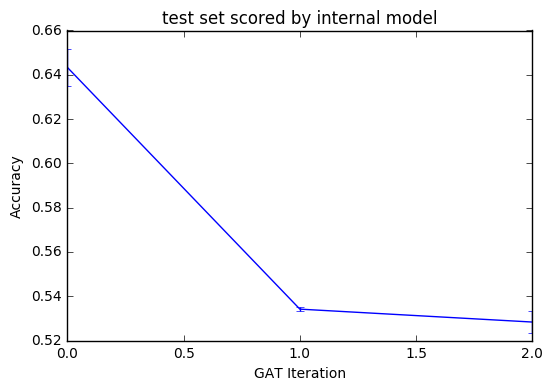

 ################################################################################


In [4]:

for pick_strategy in ['cluster','random','high_scoring']:
    for gat in [generative_training,generative_training_2]:
        for get_sampler in [GAT.get_sampler]:   # function that generates a sampler object. in case you want to change the params 
            data=make_data(assay_id,
                           repeats=repeats,
                           trainclass=1,
                           train_size=train_size,
                           neg_vec_count=train_size, 
                           test_size_per_class=300,
                           pick_strategy=pick_strategy) # cluster random  highscoring

            stuff = gat(data,niter=n_iter, get_sampler = get_sampler)   # note that i use _2 here.
            estis,newgraphs = stuff
            detailed_roc_oracle, best_graphs, quick_roc_gat, quick_roc_internal_gat,res5= evaluate_all(data, estis, newgraphs, draw_best=5)

            simple_draw_graph_quality(quick_roc_gat,title='new graphs scored by oracle', ylabel='Score')
            simple_draw_graph_quality(quick_roc_internal_gat,title='new graphs scored by internal models')
            simple_draw_graph_quality(res5,title='test set scored by internal model')
            print '#'*80

---